In [1]:
import pandas as pd
df=pd.read_csv('social_Network_Ads.csv')

In [2]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.Gender=pd.get_dummies(df.Gender,drop_first=True)

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [6]:
X = df[['Gender','Age','EstimatedSalary']]
y = df['Purchased']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) 

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_pred)
print('Test Accuracy Score', score)

Test Accuracy Score 0.53


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred2 = knn.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_pred2)
print('Test Accuracy Score', score)

Test Accuracy Score 0.81


In [13]:
error = []
import numpy as np
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred_i = neigh.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

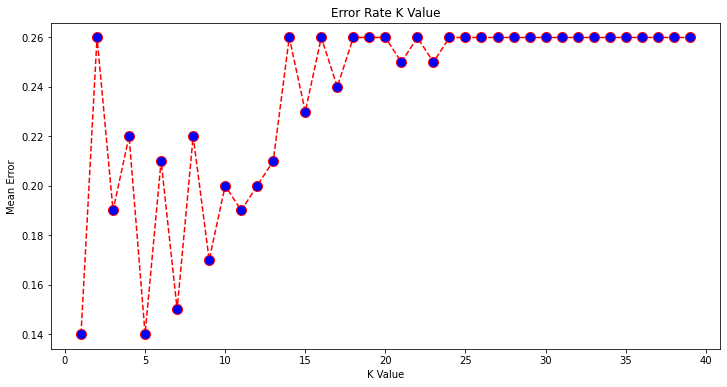

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [15]:
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [16]:
y_pred3 = classifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred3)
print('Test Accuracy Score',score)

Test Accuracy Score 0.53


In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [19]:
y_pred4=dt.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred4)
print('Test Accuracy Score',score)

Test Accuracy Score 0.85


In [24]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred5=gnb.predict(X_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred5)
print('Test Accuracy Score',score)

Test Accuracy Score 0.89
